# Chapter 5: Statistics

## Describing a single set of data



In [17]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

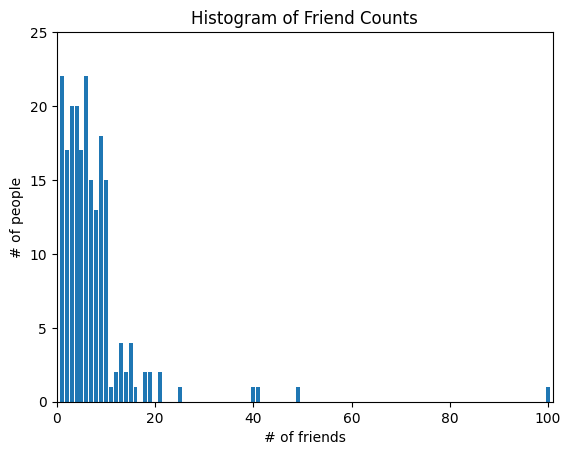

In [18]:
# As a first approach, we can use a histogram
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)
# largest value is 100
ys = [friend_counts[x] for x in xs]
# height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [19]:
# Simplest statistics is 
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)


sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

### Central tendencies

We also want to get some notion of where our data is centered. Most commonly, we can use the `mean`

In [20]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)


mean(num_friends)
# 7.333333

7.333333333333333

In [21]:
from typing import List

# Median, middle most if odd, average of two middle most if even
def _median_odd(xs: List[float]) -> float:
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    hi_mid = len(xs) // 2
    sxs = sorted(xs)
    return (sxs[hi_mid] + sxs[hi_mid-1]) /2

def median(v: List[float]) -> float:
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [22]:
# Quantiles - value under a certain percentile of the data

def quantile(xs: List[float], p: float) -> float:
    """returns the p-th percentile value in x"""
    p_index = int(p*len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

In [23]:
# Take a look at the mode
# "most common value"
def mode(x: List[float]) -> List[float]:
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

assert set(mode(num_friends)) == {1, 6}


### Dispersion

Dispersion is a measure of how spread out our data is. 

In [24]:
# Range

def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

In [25]:
from scratch.linear_algebra import sum_of_squares


def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by substracting its mean (so the result has a mean 0)"""
    """also known as 0-mean"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

In [26]:
def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55

In [27]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

In [28]:
# Robust alternative to compute the difference between the 75th and 25th percentile value
def interquartile_range(xs: List[float]) -> float:
    """Returns the diference between 75%-ile and 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6